## Workflow for Design of Experiment: _More General_

In [108]:
import numpy as np
import pandas as pd
from pyDOE2 import *
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from IPython.display import display, HTML
import plotly.graph_objs as go

#### This cell will contain a function to select among different design options like Full Factorial, Fractional Factorial, etc., and create the design table.

* The function _create_design_ is designed to accommodate different experimental needs by creating several types of designs like Full Factorial, Fractional Factorial, Plackett Burman, Box Behnken, Central Composite, and Latin Hypercube designs. 

#### Design Types:

* General Full Factorial: Generates a full factorial design with a specified number of levels and factors.
* 2 Level Full Factorial: Creates a 2-level full factorial design for a specified number of factors.
* 2 Level Fractional Factorial: Produces a fractional factorial design based on a generator string that indicates the allowed confounding.
* Plackett Burman: Used for generating fractional-factorial designs, especially for a large number of factors.
* Box Behnken: Suitable for 3-level designs and includes a central point for each factor. Often used for response surface methodology.
* Central Composite: Generates a central composite design, commonly used in response surface methodology.
* Latin Hypercube: Creates a Latin hypercube sample design, useful for creating random samples of parameter values from a multidimensional distribution.

#### Additional Notes

* It's important to refer to the documentation of pyDOE2 and the NIST handbook provided in the function comments for detailed explanations of each design type.
* _Design Selection:_ Choose the design type based on your experimental needs. For example, full factorial designs are comprehensive but may require a large number of experiments, while fractional factorial designs like Plackett Burman and Box Behnken can be more efficient.

In [111]:
def create_design(design_type, *args):
    '''
    Refer to:
     # https://pythonhosted.org/pyDOE/
     # https://www.itl.nist.gov/div898/handbook/pri/section3/pri33.htm
     # https://github.com/clicumu/pyDOE2/tree/master
    
    # Mostly Used: 
     # 2 level full factorial design for 2 Level and # factors
     # Plackett Burman for fractional-factorial designs 
     # Box Behnken for 3 level (includes a central point) for each # factors
    
    '''
    if design_type == "General Full Factorial":
        design = fullfact(*args)       # define the number of Factors for 3 Levels. Choose Box-Behnken instead.
        #design_table = fullfact([3,3])
        
    elif design_type == "2 Level Full Factorial":
        design = ff2n(*args)       # define the number of Factors ex. 3 for Temp, Slope, pH
        #design_table = create_design("2_level_full_factorial",3)
        
    elif design_type == "2 Level Fractional Factorial":
        design = fracfact(*args)   # the input to fracfact is a generator string of symbolic characters to indicate the 'confounding' that will be allowed
        #design_table = create_design("2_level_fractional_factorial",'a b ab')
        
    elif design_type == "Plackett Burman":
        design = pbdesign(*args)   # Similar to  generate fractional-factorial designs, define the number of Factors 
        #design_table = create_design("plackett_burman",3)
        
    elif design_type == "Box Behnken":
        design = bbdesign(*args)   # "These designs are rotatable (or near rotatable) and require 3 levels of each factor."
        #design_table = create_design("box_behnken",3)
        
    elif design_type == "Central Composite":
        design = ccdesign(*args)
        #design_table = ccdesign(3)
        
    elif design_type == "latin_hypercube":
        design = lhs(*args)
        
    else:
        raise ValueError("Design type not recognized")
    return pd.DataFrame(design)


### Check the chosen Design

* The plot visually demonstrates how the experiments are spread across the factor space, giving you an idea of the coverage and distribution of the experiments.

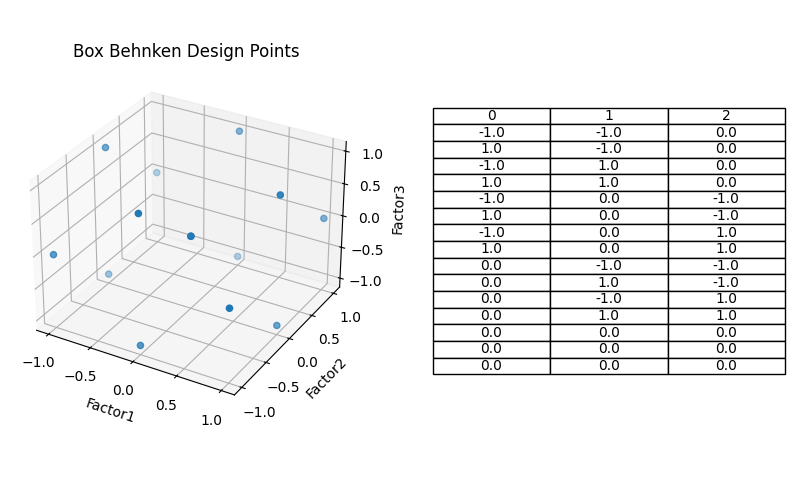

In [112]:
design_use = "Box Behnken"

design_table = create_design(design_use,3)

# Create the 3D scatter plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(121, projection='3d')  # Changed to 121 to accommodate two plots side by side
ax.scatter(design_table[0], design_table[1], design_table[2])

# Set labels and title
ax.set_xlabel('Factor1'); ax.set_ylabel('Factor2'); ax.set_zlabel('Factor3')
ax.set_title(f"{design_use} Design Points")

# Display the DataFrame next to the plot
plt.subplot(122)  # Position for the table
plt.axis('off')  # Turn off axis
plt.table(cellText=design_table.values, colLabels=design_table.columns, cellLoc = 'center', loc='center')
plt.show()

# Alternatively, if you just want to display it as a DataFrame and not as a table in the plot
#display(design_table)

In [113]:
# Create a 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=design_table[0], y=design_table[1], z=design_table[2], mode='markers',
    marker=dict(size=5, opacity=0.8,),
    text=[f'Factor1: {x}, Factor2: {y}, Factor3: {z}' for x, y, z in zip(design_table[0], design_table[1], design_table[2])]
)])

# Update layout
fig.update_layout(
    title=f"{design_use} Design Points",
    scene = dict(
        xaxis_title='Factor1',
        yaxis_title='Factor2',
        zaxis_title='Factor3')
)

fig.show()

design_table.rename(columns={0:"Factor_1", 1:"Factor_2", 2:"Factor_3"}, inplace=True)
design_table

,Factor_1,Factor_2,Factor_3
0,-1.0,-1.0,0.0
1,1.0,-1.0,0.0
2,-1.0,1.0,0.0
3,1.0,1.0,0.0
4,-1.0,0.0,-1.0
5,1.0,0.0,-1.0
6,-1.0,0.0,1.0
7,1.0,0.0,1.0
8,0.0,-1.0,-1.0
9,0.0,1.0,-1.0


#### Setting up your experimental table

* Defining Factor Values

* Create the Experimental table that will be used in the wet- laboratory

    * The DataFrame is saved as a CSV file named "Experimental Table from DoE - screening 3F 2L.csv". The sep=";" specifies that the separator used in the file is a semicolon. index=False ensures that the DataFrame index is not included in the CSV file.



In [119]:
Factor_1 = [10, 20, 30]  # Values for Factor 1
Factor_2 = [4.2, 7, 9.8]  # Values for Factor 2
Factor_3 = [0.5, 1, 1.5]  # Values for Factor 3

# Mapping for each factor
mapping_factor_1 = {-1: min(Factor_1), 0: sum(Factor_1)/len(Factor_1), 1: max(Factor_1)}
mapping_factor_2 = {-1: min(Factor_2), 0: sum(Factor_2)/len(Factor_2), 1: max(Factor_2)}
mapping_factor_3 = {-1: min(Factor_3), 0: sum(Factor_3)/len(Factor_3), 1: max(Factor_3)}

# Assuming 'design_table' is the DataFrame with -1, 0, and +1 (ex. box_behnken design)
exp_table = design_table.copy()

exp_table.iloc[:, 0] = exp_table.iloc[:, 0].map(mapping_factor_1)
exp_table.iloc[:, 1] = exp_table.iloc[:, 1].map(mapping_factor_2)
exp_table.iloc[:, 2] = exp_table.iloc[:, 2].map(mapping_factor_3)

exp_table["Experiment#"] = exp_table.index
exp_table['Results'] = exp_table.apply(lambda _: '', axis=1)

exp_table = exp_table[['Experiment#', 'Factor_1', 'Factor_2', 'Factor_3', 'Results']]

exp_table.rename(columns={0:"Factor_1", 1:"Factor_2", 2:"Factor_3"}, inplace=True)

# Display the modified DataFrame
#display(exp_table)

exp_table.to_csv(f"Experimental Table from DoE - {design_use}.csv", sep=";", index=False)
print(f"Your experimental table ({design_use}) is ready as a CSV file for use.")

Your experimental table (Box Behnken) is ready as a CSV file for use.


In [127]:
# Create a 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=exp_table["Factor_1"], y=exp_table["Factor_2"], z=exp_table["Factor_3"], mode='markers',
    marker=dict(size=5, opacity=0.8,),
    text=[f'Factor1: {x}, Factor2: {y}, Factor3: {z}' for x, y, z in zip(exp_table["Factor_1"], exp_table["Factor_2"], exp_table["Factor_3"])]
)])

# Update layout
fig.update_layout(
    title=f"{exp_table} Design Points",
    scene = dict(
        xaxis_title='Factor1',
        yaxis_title='Factor2',
        zaxis_title='Factor3')
)

fig.show()

### Add columns that represent interaction between Factors and the results from the experiments

* This adds a new column Results to design_table, containing the results from the experiments.

In [130]:
B0 = np.ones(len(design_table))
design_table["B0"] = B0

# Create new columns by multiplying existing columns
design_table['Factor_1_2'] = design_table['Factor_1'] * design_table['Factor_2']
design_table['Factor_1_1'] = design_table['Factor_1'] * design_table['Factor_1']
design_table['Factor_2_2'] = design_table['Factor_2'] * design_table['Factor_2']


#results = pd.read_csv("results.csv")

num_rows = len(design_table)
random_floats = np.random.random(num_rows)
results = pd.DataFrame({'Result': random_floats})

design_table["Results"] = results

design_table = design_table[['B0', 'Factor_1', 'Factor_2', 'Factor_3', 'Factor_1_2', 'Factor_1_1','Factor_2_2', 'Results']]

design_table

,B0,Factor_1,Factor_2,Factor_3,Factor_1_2,Factor_1_1,Factor_2_2,Results
0,1.0,-1.0,-1.0,0.0,1.0,1.0,1.0,0.877634
1,1.0,1.0,-1.0,0.0,-1.0,1.0,1.0,0.643164
2,1.0,-1.0,1.0,0.0,-1.0,1.0,1.0,0.112341
3,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.934924
4,1.0,-1.0,0.0,-1.0,-0.0,1.0,0.0,0.052340
5,1.0,1.0,0.0,-1.0,0.0,1.0,0.0,0.082700
6,1.0,-1.0,0.0,1.0,-0.0,1.0,0.0,0.171802
7,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.619371
8,1.0,0.0,-1.0,-1.0,-0.0,0.0,1.0,0.293145
9,1.0,0.0,1.0,-1.0,0.0,0.0,1.0,0.354755


In [139]:
# Extracting y-values (dependent variable) and x-values (independent variables)
y = design_table[['Results']].values
X = design_table[["Factor_1", "Factor_2", "Factor_1_2", "Factor_1_1", "Factor_2_2"]].values

# Add a column of ones to X to include an intercept in the model
X = np.hstack([np.ones((X.shape[0], 1)), X])

# Perform linear regression
coefficients, residuals, rank, s = np.linalg.lstsq(X, y, rcond=None)

# The standard error (square root of the diagonal of the covariance matrix)
standard_error = np.sqrt(residuals / (len(y) - len(coefficients)))

# Accessing the sixth element (note: Python is zero-indexed, so it's the fifth element in Python)
# In case of multiple regression, you might need to adjust the index based on the output structure
sixth_element = standard_error[0] if len(standard_error) > 0 else None

#display(coefficients)

### Creating the Response Surface matrix

* Creating a Response Surface matrix involves setting up a framework where you can later input the responses (or outcomes) of your experiments based on varying levels of two factors. The code you've provided sets up such a matrix with values ranging from -1 to 1 (representing the factor levels) and divides this range into 11 steps.

* When you run Resp_surf_ffact, it will display an 11x11 grid. Initially, all cells are filled with zeros. This matrix serves as a template where you can input the results of your experiments. Each cell corresponds to a combination of factor levels (one level from the horizontal axis and one from the vertical axis).

In [176]:
vector = np.linspace(-1, 1, 11)

# Create an 11x11 DataFrame with zeros (or any default value)
Resp_surf = pd.DataFrame(np.zeros((12, 12)))

# Set the headers and index with the same vector values
Resp_surf.columns = [''] + list(vector)
Resp_surf.index = [''] + list(vector)
Resp_surf = Resp_surf.iloc[1:]
Resp_surf = Resp_surf.iloc[:, 1:]
#Resp_surf

Ensure that the coefficients array is defined with the appropriate values. This array should contain six elements representing the constant term, the linear coefficients, the interaction coefficient, and the quadratic coefficients.

In [177]:
Resp_surf_ffact2 = Resp_surf_ffact

# Populate the DataFrame
for i in range(11):  # Skip the first row and column
    for j in range(11):
        x = Resp_surf.columns[j]  # Corresponding vector value for the column
        y = Resp_surf.index[i]    # Corresponding vector value for the row
        # Apply the formula
        Resp_surf.iloc[i, j] = (coefficients[0] + coefficients[1]*x + coefficients[2]*y +
                                coefficients[3]*x*y + coefficients[4]*x*x + coefficients[5]*y*y)

# Display the updated DataFrame
#display(Resp_surf)

#### Creating a 3D surface plot from the data in your Response Surface matrix

* This type of plot is particularly useful for visualizing the relationship between two factors and a response variable in a clear, intuitive manner.

Interpretation:

* The plot visually represents how changes in 'Factor_1' and 'Factor_2' together affect the yield (response variable). Peaks and valleys in the surface indicate combinations of factor levels that result in high and low yields, respectively.

Optimization:

* This kind of plot can be used to identify optimal combinations of factor levels for maximizing or minimizing the response variable.

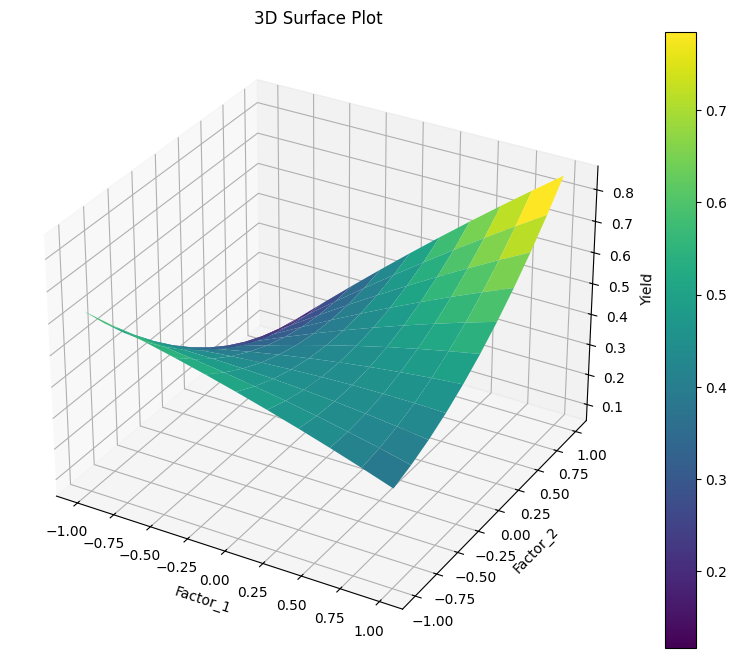

In [178]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

# Assuming Resp_surf2 is your DataFrame

# Create coordinate arrays for the x and y values
X, Y = np.meshgrid(Resp_surf_ffact2.columns.astype(float), Resp_surf_ffact2.index.astype(float))

# Get the z values from the DataFrame and handle NaN or infinite values
Z = Resp_surf_ffact2.values
Z = np.nan_to_num(Z)  # Replace NaN with 0 and infinite with large finite numbers

# Ensure all arrays are of numeric type
X, Y, Z = [np.array(arr, dtype=float) for arr in [X, Y, Z]]

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot a surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

# Add labels and title
ax.set_xlabel('Factor_1')
ax.set_ylabel('Factor_2')
ax.set_zlabel('Yield')
ax.set_title('3D Surface Plot')

# Add a color bar
fig.colorbar(surf)

plt.show()

In [175]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd

# Assuming Resp_surf2 is your DataFrame

# Create coordinate arrays for the x and y values
X, Y = np.meshgrid(Resp_surf_ffact2.columns.astype(float), Resp_surf_ffact2.index.astype(float))

# Get the z values from the DataFrame
Z = Resp_surf_ffact2.values

# Create a Plotly 3D surface plot
fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y, contours_z=dict(
    show=True, usecolormap=True, highlightcolor="limegreen", project_z=True))])

# Update the layout
fig.update_layout(
    title='3D Surface Plot with Projections',
    scene=dict(
        xaxis_title='Factor_1',
        yaxis_title='Factor_1',
        zaxis_title='Intensity'
    ),
    autosize=False,
    width=800,
    height=800,
    margin=dict(l=65, r=50, b=65, t=90)
)

# Show the plot
fig.show()
